# Домашнее задание 3. Математика для data sciense. Нетология.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Решить систему линейных уравнений:

![alt text](https://italiandirectory.eu/wp-content/ql-cache/quicklatex.com-34a5602e13176cbddcfd35cca34478fe_l3.svg)

In [ ]:
# b + c = -8
# 3b + 2c = -1

In [2]:
a = np.array([[1,1], [3,2]])
b = np.array([-8,-1])
x = np.linalg.solve(a, b)
x

array([ 15., -23.])

In [3]:
# check result
np.allclose(np.dot(a, x), b)

True

Анна выбирает тарифный план для телефонной связи. Первый план, T1, стоит 20 долларов в месяц, каждый звонок стоит 25 центов в минуту. Второй тарифный план, T2, стоит 40долларов в месяц, но звонки стоят 8 центов в минуту. Какой план ей выбрать, если Анна звонит не более 117 минут в месяц?

Составим задачу в системе линейных уравнений. 

Количество минут - независимая переменная, будет нашим x. Стоимость тарифа - зависимая величина, будет нашим y. 

Написать систему уравнений для данной задачи, построить график, найти точку пересечения прямых. 
Сделать вывод о том, какой тариф использовать лучше для Анны.

$$\left\{\begin{matrix}
y=.25x + 20\\ 
y=.08x + 40
\end{matrix}\right.$$

Представим x ввиде $x_1$, а y - ввиде $x_2$:

$$\left\{\begin{matrix}
x_2-.25x_1=20\\ 
x_2-.08x_1=40
\end{matrix}\right.$$

Матрица A будет представлена следующими весами:

$$\boldsymbol{A}=\begin{bmatrix}
-.25 & 1\\ 
-.08 & 1
\end{bmatrix}$$

Вектор b будет выглядеть следующим образом:
$$b=\begin{bmatrix}
20\\ 
40\end{bmatrix}$$

Система уравнений в матричной форме выглядит следующим образом:
$$\begin{bmatrix}
-.25 & 1\\ 
-.08 & 1
\end{bmatrix}\cdot \begin{bmatrix}
x_1\\ 
x_2
\end{bmatrix}=\begin{bmatrix}
20\\ 
40
\end{bmatrix}$$

In [22]:
A = np.array([[-0.25, 1 ], [-.08, 1]])
print(A)

[[-0.25  1.  ]
 [-0.08  1.  ]]


In [23]:
A_inv = np.linalg.inv(A)
A_inv

array([[-5.88235294,  5.88235294],
       [-0.47058824,  1.47058824]])

In [49]:
b = np.array([[20], [40]])

In [50]:
X = A_inv.dot(b)
X

array([[117.64705882],
       [ 49.41176471]])

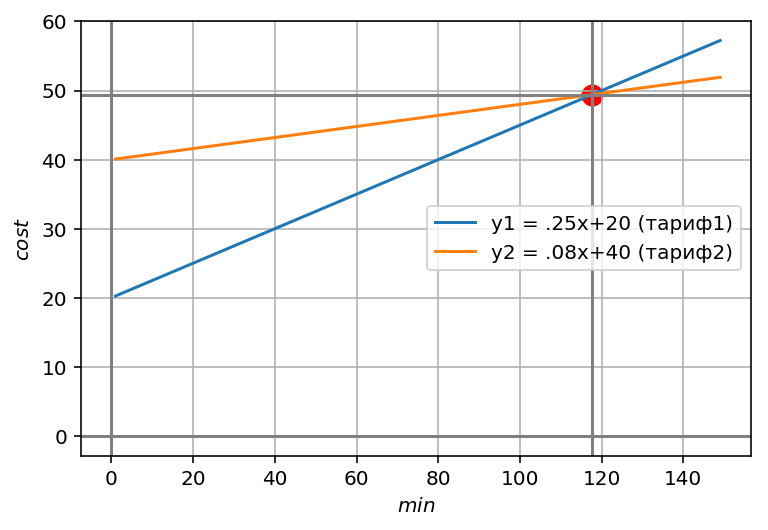

In [44]:
x = np.arange(1, 150)
y1 = .25 * x + 20
y2 = .08 * x + 40

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.grid()
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
plt.axhline(y=49.41176471, color='grey')
plt.axvline(x=117.64705882, color='grey')
plt.scatter(X[0],X[1],marker='o',color = 'r',s = 100)
plt.legend(['y1 = .25x+20 (тариф1)','y2 = .08x+40 (тариф2)'])
plt.xlabel('$min$')
plt.ylabel('$cost$')
plt.show()

In [ ]:
# какие-то сомнения по поводу решения сверху, никак не могу понять пункт про пересечение графиков
# аналитически, мне кажется, задачу проще решить или я не понял условие задачи

In [ ]:
# по графику ниже видно, что при Т1 Анна проговорит 80 мин в месяц, дальше придется еще заплатить 20$
# если Анна говорит >80 мин, то Т2

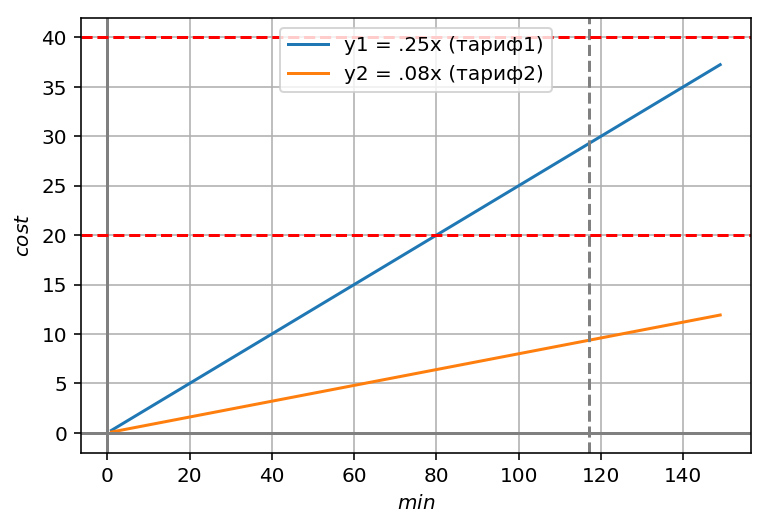

In [64]:
x = np.arange(1, 150)
y1 = .25 * x 
y2 = .08 * x

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.grid()
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
plt.axvline(x=117, color='grey',ls = '--')
plt.axhline(y=20, color='red',ls = '--')
plt.axhline(y=40, color='red',ls = '--')
plt.axhline(y=0, color='grey')
plt.legend(['y1 = .25x (тариф1)','y2 = .08x (тариф2)'],loc = 'best')
plt.xlabel('$min$')
plt.ylabel('$cost$')
plt.show()

Загрузить датасет Boston houses. 
Выбрать 3-хмерное пространство (3 атрибута из таблицы), взять 3 дома по данному трехмерному пространству, доказать, что данные векторы не компланарны.

In [ ]:
# докажем, что определитель не равен 0

In [76]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()

In [77]:
data = pd.DataFrame(data=boston.data,columns=boston.feature_names)

In [79]:
data.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [87]:
house1 = data.loc[0,'CRIM':'INDUS'].values
house2 = data.loc[1,'CRIM':'INDUS'].values
house3 = data.loc[2,'CRIM':'INDUS'].values

In [93]:
matrix_h = np.array([house1,house2,house3])

In [98]:
# compute determinate
print(np.linalg.det(matrix_h)==0)

False


In [ ]:
# данные векторы не компланарны

Для матрицы, полученной на предыдущей задачe, посчитать собственный вектор(v). Умножить собственный вектор на матрицу (Av). Сделать график. Во сколько раз Av отличается от v?

In [100]:
# собственные вектора для matrix_h
np.linalg.eig(matrix_h)[1]

array([[-8.95407579e-01, -9.99984376e-01, -9.99992459e-01],
       [-3.14838724e-01,  4.08209165e-03, -4.04944511e-04],
       [-3.14836219e-01,  3.81887042e-03,  3.86250300e-03]])

In [102]:
# возьмем третий собственный вектор
v = np.linalg.eig(matrix_h)[1][:,2]
v

array([-9.99992459e-01, -4.04944511e-04,  3.86250300e-03])

In [105]:
A = matrix_h.copy()
Av = A.dot(v)
Av

array([-4.68657160e-03, -1.89781576e-06,  1.81020334e-05])

(-1e-05, 5e-05)

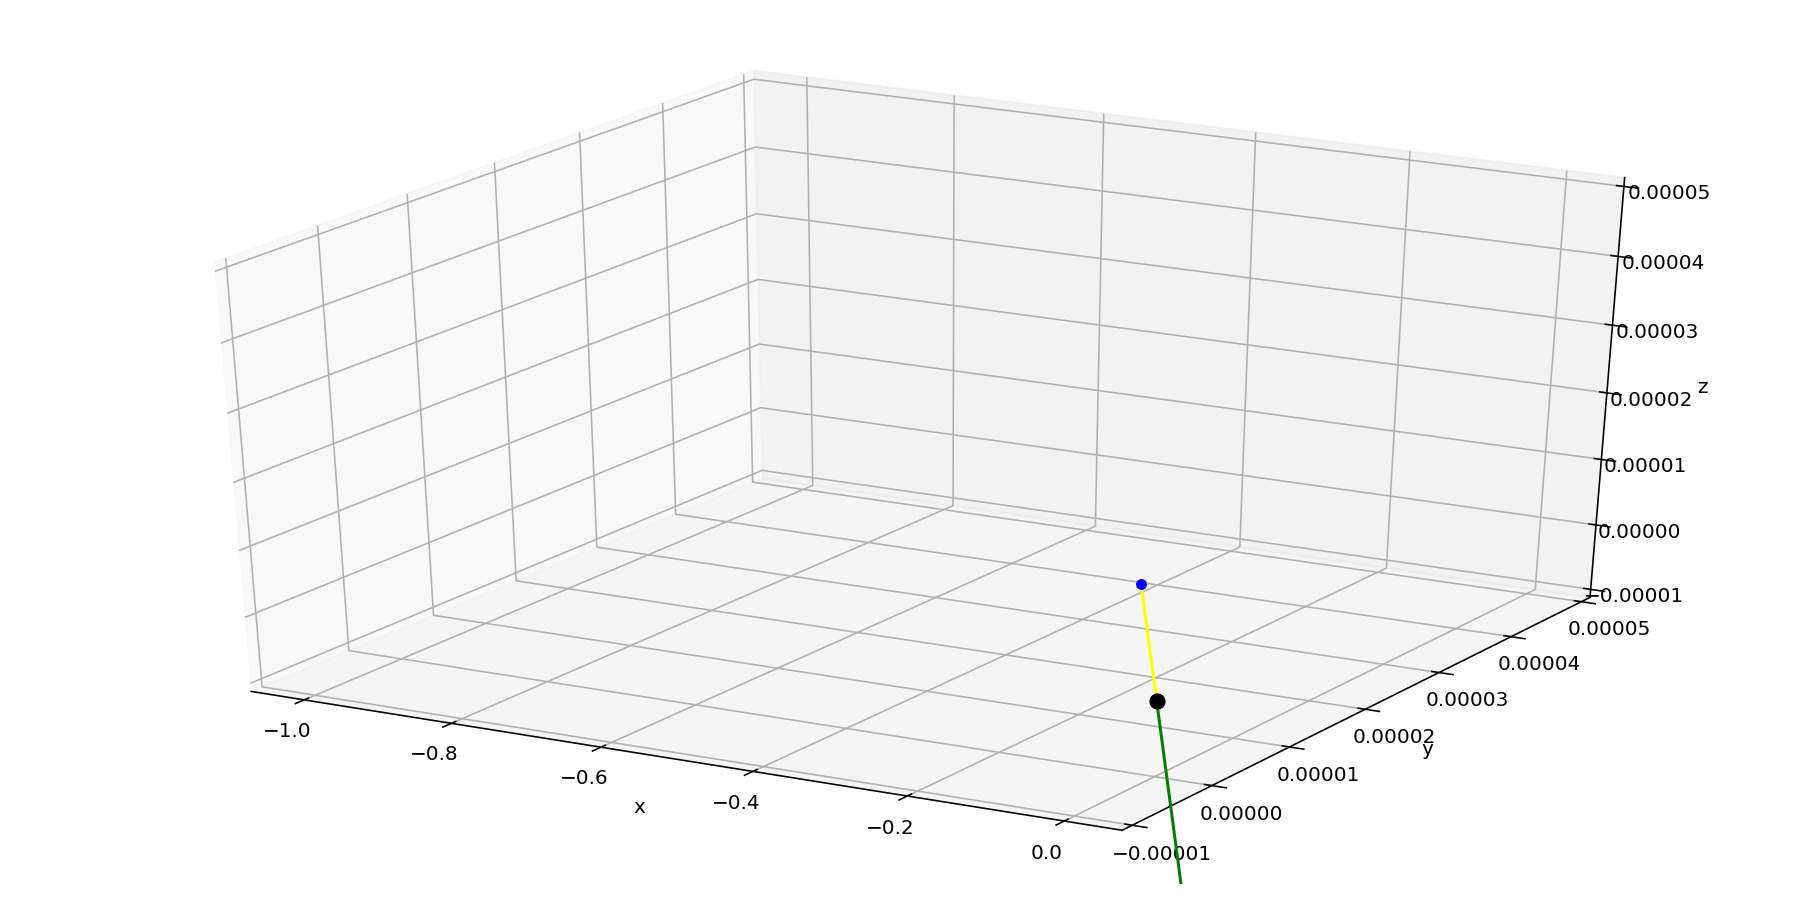

In [171]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16, 8))
ax = fig.gca(projection='3d')

ax.plot([0,Av[0]], [0,Av[1]], [0,Av[2]], c='yellow')
ax.plot([0,v[0]], [0,v[1]], [0,v[2]],c='green')

ax.scatter(Av[0], Av[1], Av[2],c ='blue', marker='o')
ax.scatter(0, 0, 0, c='black', marker='o',s= 50)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax.set_ylim3d(-0.00001,0.00005)
ax.set_zlim3d(-0.00001,0.00005)

In [168]:
# Во сколько раз Av отличается от v
print('В {} раза'.format(round((Av/v)[0],3)))

В 0.005 раза


Задание повышенного уровня.

Как посчитать интеграл полинома, полученного в домашнем задании №2, при полиномиальной регрессии?

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
price = boston_dataset.target
  
x = boston.LSTAT

x = np.array(x).reshape(-1, 1)
y = price

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(x) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression()
model = lin2.fit(X_poly, y)

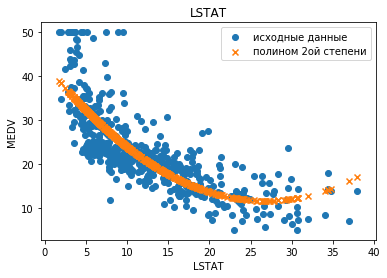

In [9]:
y_pred = model.predict(poly.fit_transform(x))
plt.scatter(x, y, marker='o')
plt.scatter(x, y_pred, marker='x')
plt.title('LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(['исходные данные', 'полином 2ой степени'])
plt.show()